# INTRO

There are two separate target columns to predict, each in dataset 1 and dataset 2.

This notebook is about dataset 1

# 1. GETTING READY

In [288]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from fast_ml.feature_selection import get_duplicate_features
from fast_ml.feature_selection import get_constant_features

In [289]:
#import dataset
df = pd.read_csv("../data/dataset_1.csv")

# 2. SPLITTING

In [290]:
# data on which we base
X = df.drop(columns=['target'])

# data which we predict
y = df['target']

In [291]:
# getting train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# getting test and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.3, random_state=42
)

In [292]:
# checking shapes of X's
print(X.shape, X_train.shape, X_test.shape, X_val.shape)

(50000, 300) (35000, 300) (10500, 300) (4500, 300)


In [293]:
# checking shapes of y's
print(y.shape, y_train.shape, y_test.shape, y_val.shape)

(50000,) (35000,) (10500,) (4500,)


# EXPORTING

In [294]:
# exporting data
relative_path = "./validation"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)

X_train.to_csv('validation/X_train_dataset_1.csv', encoding='utf-8')
X_test.to_csv('validation/X_test_dataset_1.csv', encoding='utf-8')
X_val.to_csv('validation/X_val_dataset_1.csv', encoding='utf-8')

y_train.to_csv('validation/y_train_dataset_1.csv', encoding='utf-8')
y_test.to_csv('validation/y_test_dataset_1.csv', encoding='utf-8')
y_val.to_csv('validation/y_val_dataset_1.csv', encoding='utf-8')

### in theory outliers, NAs handling and NAs replacing should be before features number reduction. Otherwise NAs replacing can produce type of columns that could have been handled with features number reduction methods (which was already done). Alas, doing so would mean analysing 300 separeted histogram plots manually so as to determine whether column has outlier or not which is not impossible but undoubtadly needlessly hard. So we decided to reduce number of features first and then whilst having only few columns (~50) look for possible outliers through plots

# 2. DATASET INFO

In [295]:
# first five rows
X_train.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
13889,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
18173,0,0,0.0,2.91,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
11779,0,0,0.0,2.82,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
28068,0,0,0.0,5.82,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
26232,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0


In [296]:
y_train.head()

13889    0
18173    0
11779    0
28068    0
26232    0
Name: target, dtype: int64

In [297]:
# shape
X_train.shape

(35000, 300)

In [298]:
# info
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 13889 to 47738
Data columns (total 300 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    var_1    35000 non-null  int64  
 1    var_2    35000 non-null  int64  
 2    var_3    35000 non-null  float64
 3    var_4    35000 non-null  float64
 4    var_5    35000 non-null  float64
 5    var_6    35000 non-null  int64  
 6    var_7    35000 non-null  int64  
 7    var_8    35000 non-null  int64  
 8    var_9    35000 non-null  int64  
 9    var_10   35000 non-null  int64  
 10   var_11   35000 non-null  float64
 11   var_12   35000 non-null  float64
 12   var_13   35000 non-null  float64
 13   var_14   35000 non-null  int64  
 14   var_15   35000 non-null  int64  
 15   var_16   35000 non-null  float64
 16   var_17   35000 non-null  float64
 17   var_18   35000 non-null  float64
 18   var_19   35000 non-null  int64  
 19   var_20   35000 non-null  int64  
 20   var_21   35000 non-nul

In [299]:
# description
X_train.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.000000,...,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,3.500000e+04
mean,0.002229,0.000029,16.754658,3.152425,623.621139,5.714286e+03,0.000257,0.033257,0.000257,0.000257,...,0.006686,0.083938,0.010114,0.0,0.128229,0.085200,0.0,0.003343,15.130148,5.643619e+03
std,0.113369,0.005345,1426.650119,2.745780,10899.867683,7.559181e+05,0.027774,0.314115,0.027774,0.035856,...,0.143274,1.107691,0.212500,0.0,0.608109,0.603805,0.0,0.082914,952.917261,4.711153e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,2.850000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
max,9.000000,1.000000,207901.336500,35.280000,445500.000000,1.000000e+08,3.000000,3.000000,3.000000,6.000000,...,6.000000,74.520000,12.000000,0.0,6.000000,33.000000,0.0,3.000000,134666.681100,2.857673e+06


# 4. FEATURES NUMBER REDUCTION

## 4.1. Duplicate features

In [300]:
# looking for duplicate features
# duplicate features are whern two columns X and Y have same value for every index

duplicate_features = get_duplicate_features(X_train)

print(duplicate_features.shape)
duplicate_features.head()

(121, 3)


,Desc,feature1,feature2
0,Duplicate Values,var_43,var_106
1,Duplicate Values,var_14,var_129
2,Duplicate Values,var_14,var_158
3,Duplicate Values,var_14,var_167
4,Duplicate Values,var_14,var_171


In [301]:
# what are types of duplicates
duplicate_features['Desc'].unique()

array(['Duplicate Values', 'Duplicate Index'], dtype=object)

In [302]:
# flatten dataframe with duplicate features to list
duplicate_features = duplicate_features[duplicate_features['Desc'] == 'Duplicate Values']['feature2'].tolist()
print(duplicate_features)

['var_106', 'var_129', 'var_158', 'var_167', 'var_171', 'var_285', 'var_182', 'var_195', 'var_196', 'var_212', 'var_215', 'var_225', 'var_250', 'var_248', 'var_287', 'var_294', 'var_297', 'var_183', 'var_104', 'var_239', 'var_296', 'var_148', 'var_223', 'var_216', 'var_289', 'var_199', 'var_227', 'var_180', 'var_178', 'var_135', 'var_201', 'var_127', 'var_80', 'var_269', 'var_116', 'var_232', 'var_263', 'var_122', 'var_23', 'var_33', 'var_44', 'var_66', 'var_67', 'var_69', 'var_61', 'var_81', 'var_120', 'var_113', 'var_112', 'var_151', 'var_92', 'var_97', 'var_87', 'var_99']


In [303]:
# drop duplicate features and show difference
print('X_train shape before dropping duplicates: ', X_train.shape)
X_train.drop(columns = duplicate_features, inplace=True)
print('X_train shape after dropping duplicates: ', X_train.shape)

X_train shape before dropping duplicates:  (35000, 300)
X_train shape after dropping duplicates:  (35000, 246)


In [304]:
# function to pipeline - transformer
def drop_duplicate_features(df):
    duplicate_features = get_duplicate_features(df)
    duplicate_features['Desc'].unique()
    duplicate_features = duplicate_features[duplicate_features['Desc'] == 'Duplicate Values']['feature2'].tolist()
    df.drop(columns = duplicate_features, inplace=True)

## 4.2. Constant features

In [305]:
# looking for constant features
constant_features = get_constant_features(X_train)

print(constant_features.shape)
constant_features.head()

(125, 4)


,Desc,Var,Value,Perc
0,Constant,var_14,0.0,100.000000
1,Constant,var_89,0.0,100.000000
2,Quasi Constant,var_170,0.0,99.997143
3,Quasi Constant,var_34,0.0,99.997143
4,Quasi Constant,var_234,0.0,99.997143


In [306]:
# what are types of constant features
constant_features['Desc'].unique()

array(['Constant', 'Quasi Constant'], dtype=object)

In [307]:
# flatten dataframe with constant columns to list
constant_features = constant_features[constant_features['Perc'] > 98]['Var'].tolist()
print(constant_features)
print("number of columns", len(constant_features))

['var_14', 'var_89', 'var_170', 'var_34', 'var_234', 'var_243', 'var_247', 'var_124', 'var_73', 'var_2', 'var_133', 'var_280', 'var_283', 'var_36', 'var_72', 'var_65', 'var_150', 'var_111', 'var_153', 'var_187', 'var_189', 'var_210', 'var_217', 'var_141', 'var_228', 'var_10', 'var_28', 'var_6', 'var_12', 'var_233', 'var_11', 'var_7', 'var_265', 'var_9', 'var_71', 'var_20', 'var_267', 'var_146', 'var_221', 'var_257', 'var_59', 'var_90', 'var_126', 'var_149', 'var_204', 'var_274', 'var_136', 'var_1', 'var_3', 'var_202', 'var_138', 'var_264', 'var_95', 'var_184', 'var_235', 'var_60', 'var_42', 'var_290', 'var_142', 'var_237', 'var_77', 'var_299', 'var_45', 'var_53', 'var_78', 'var_254', 'var_260', 'var_219', 'var_211', 'var_43', 'var_224', 'var_246', 'var_197', 'var_32', 'var_24', 'var_102', 'var_48', 'var_125', 'var_115', 'var_98', 'var_282', 'var_159', 'var_39', 'var_286', 'var_298', 'var_245', 'var_40', 'var_236', 'var_249', 'var_16', 'var_130', 'var_56', 'var_291', 'var_251', 'var_194

In [308]:
# drop constant features and show difference
print('X_train shape before dropping constant features: ', X_train.shape)
X_train.drop(columns = constant_features, inplace=True)
print('X_train shape after dropping constant features: ', X_train.shape)

X_train shape before dropping constant features:  (35000, 246)
X_train shape after dropping constant features:  (35000, 121)


In [309]:
# function to pipeline - transformer
def drop_constant_features(df):
    constant_features = get_constant_features(df)
    constant_features['Desc'].unique()
    constant_features = constant_features[constant_features['Perc'] > 98]['Var'].tolist()
    df.drop(columns = constant_features, inplace=True)

## 4.3. Correlated features

In [310]:
# getting correlation matrix
corr = X_train.corr(method="spearman").abs()

# getting only values above main diagonal, since correlation matrix is symmetric
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [311]:
# looking for highly correlated features
corr_features = []
for col in upper_triangle:
    if any(upper_triangle[col] > 0.8):
        corr_features.append(col)
        
        
corr_features = pd.Series(corr_features)

print(corr_features.shape)
corr_features.head()

(86,)


0    var_38
1    var_51
2    var_52
3    var_54
4    var_55
dtype: object

In [312]:
# drop highly correlated features and show difference
print('X_train shape before dropping highly correlated features: ', X_train.shape)
X_train.drop(columns = corr_features, inplace=True)
print('X_train shape after dropping highly correlated features: ', X_train.shape)

X_train shape before dropping highly correlated features:  (35000, 121)
X_train shape after dropping highly correlated features:  (35000, 35)


In [313]:
# function to pipeline - transformer
def drop_correlated_features(df):
    corr = df.corr(method="spearman").abs()
    upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    
    corr_features = []
    for col in upper_triangle:
        if any(upper_triangle[col] > 0.8): 
            corr_features.append(col)

    corr_features = pd.Series(corr_features)
    df.drop(columns = corr_features, inplace=True)

# 5. TRANSFORMATIONS

## 5.1. Outliers

array([[<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_8'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_19'}>],
       [<AxesSubplot:title={'center':'var_21'}>,
        <AxesSubplot:title={'center':'var_29'}>,
        <AxesSubplot:title={'center':'var_30'}>,
        <AxesSubplot:title={'center':'var_31'}>,
        <AxesSubplot:title={'center':'var_35'}>,
        <AxesSubplot:title={'center':'var_37'}>],
       [<AxesSubplot:title={'center':'var_41'}>,
        <AxesSubplot:title={'center':'var_46'}>,
        <AxesSubplot:title={'center':'var_47'}>,
        <AxesSubplot:title={'center':'var_49'}>,
        <AxesSubplot:title={'center':'var_50'}>,
        <AxesSubplot:title={'center':'var_57'}>],
       [<AxesSubplot:title={'center':'var_74'}>,
        <AxesSubplot:title={'center':'var_76'}>,
        <AxesSubplo

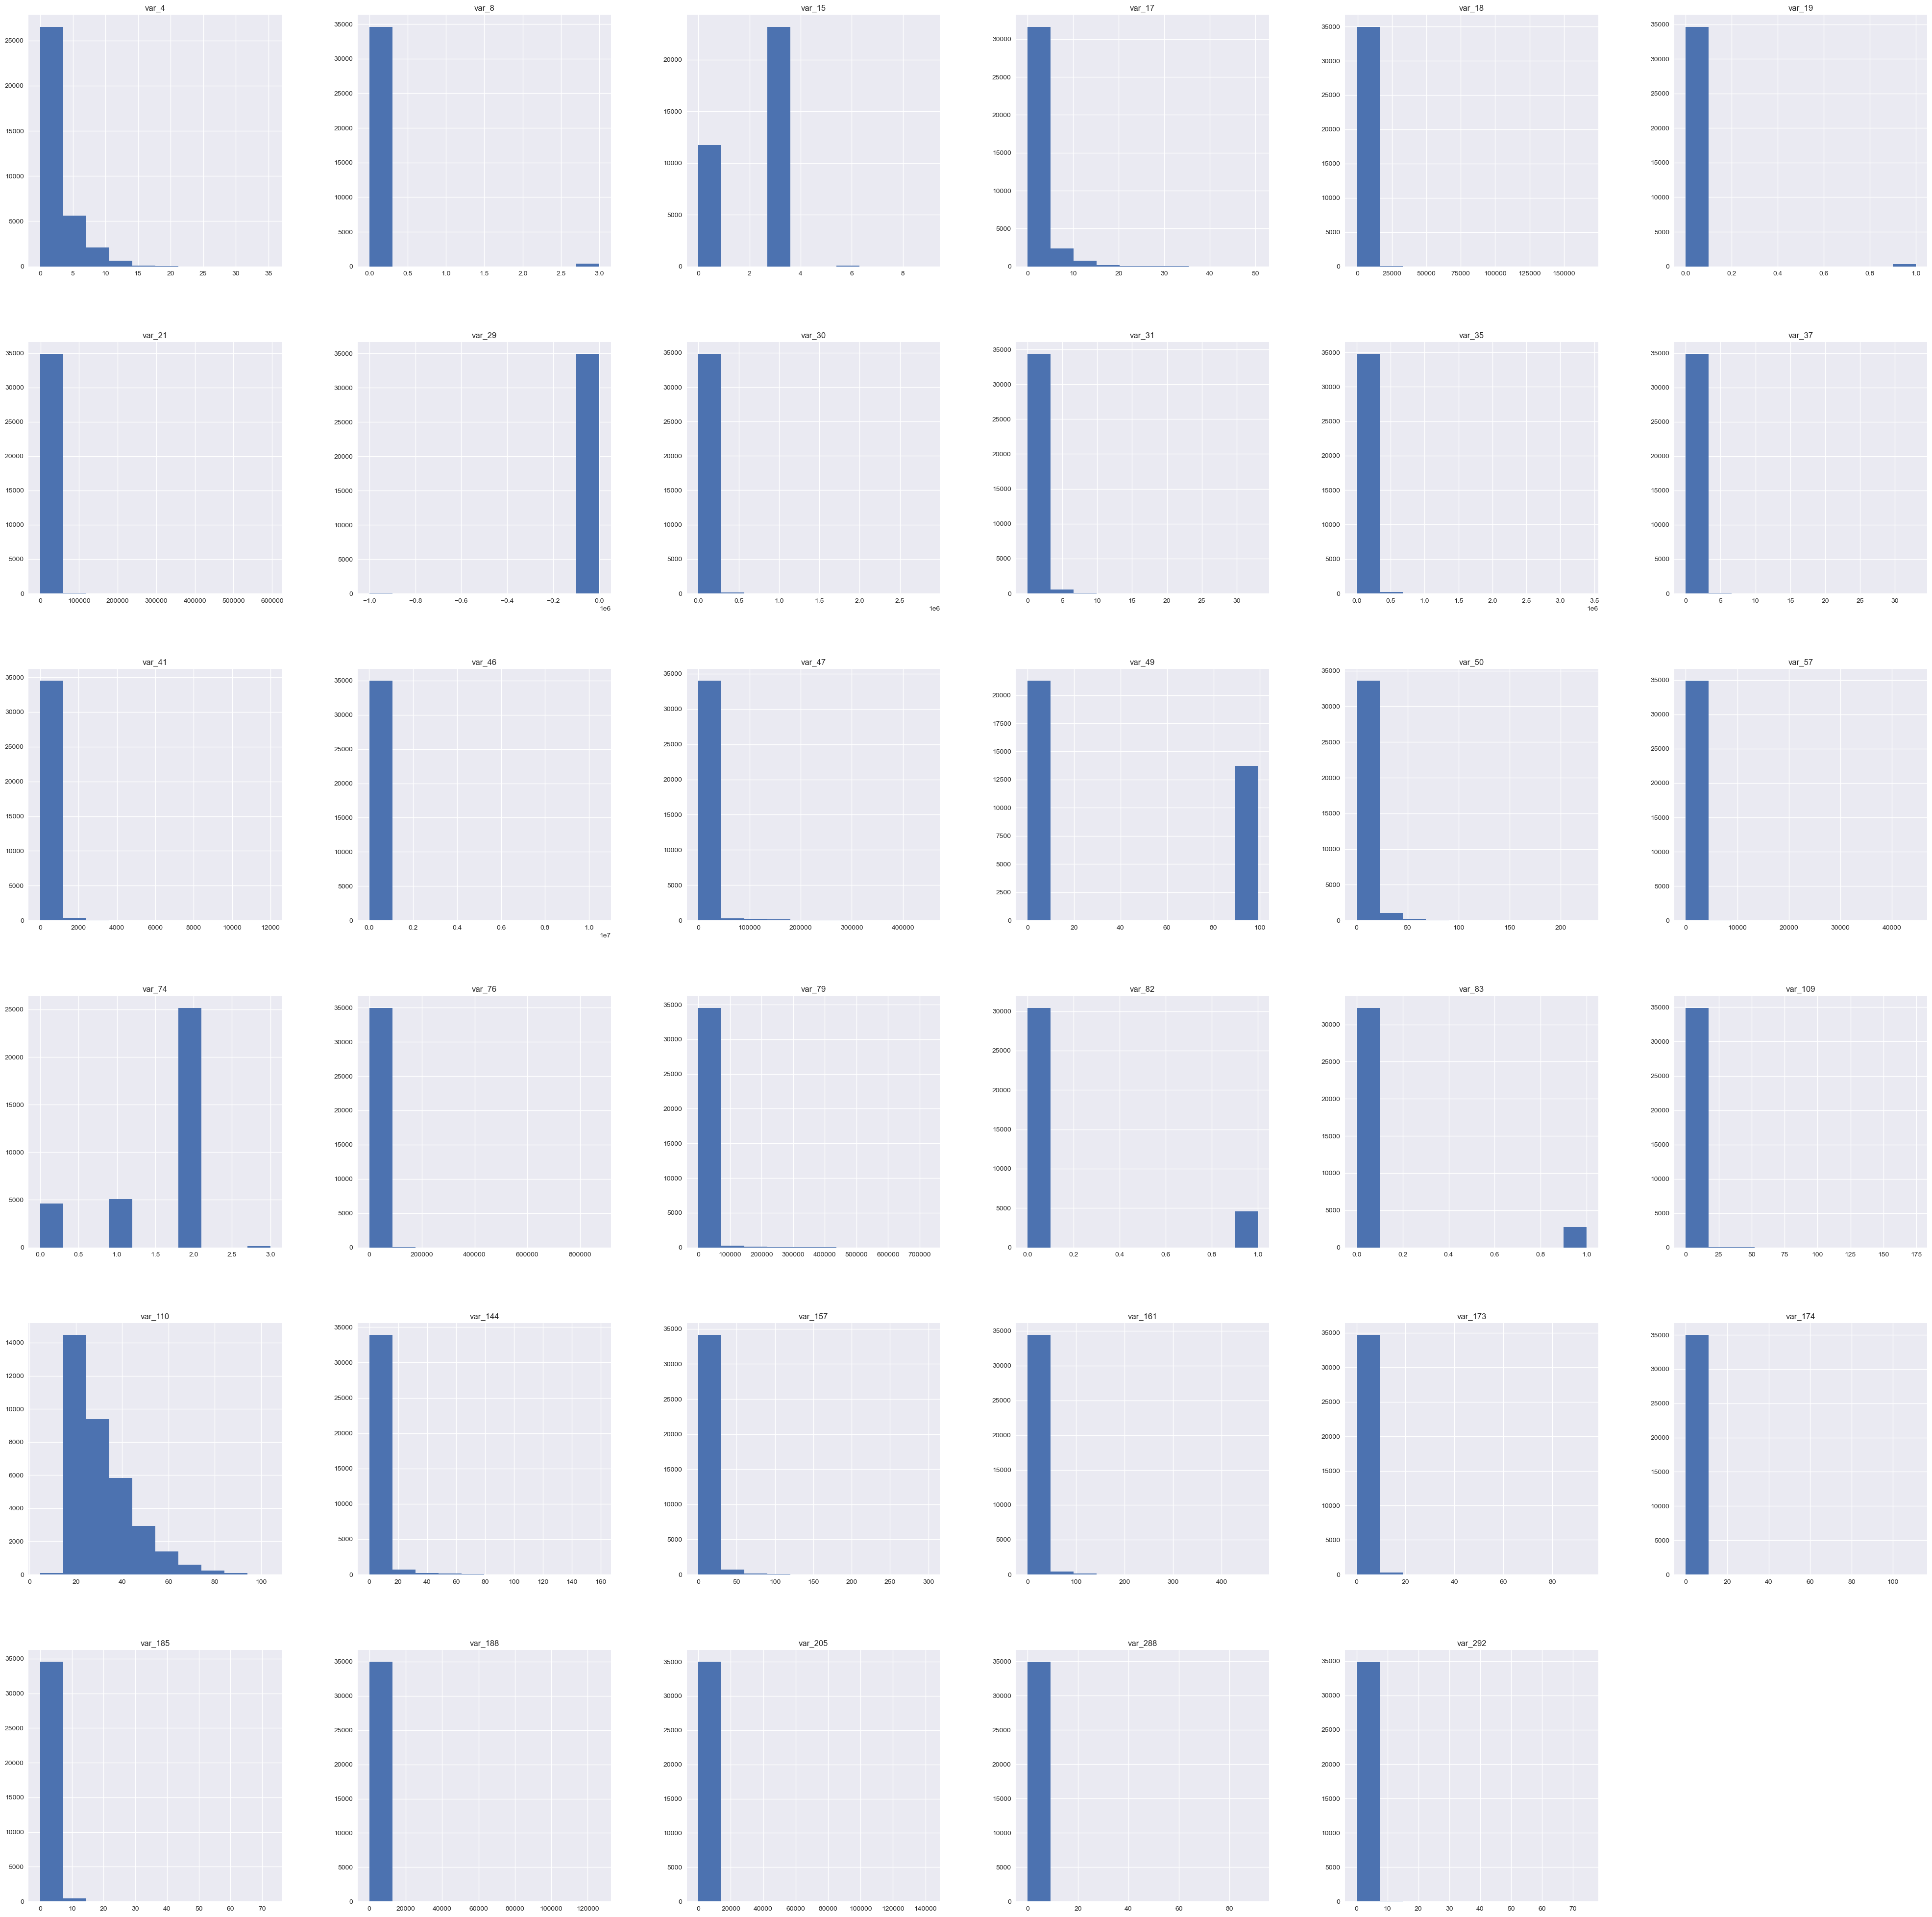

In [314]:
# take a look at dataframe so to find outliers
X_train.hist(figsize=(50, 50))

In [318]:
import numpy as np
from scipy.stats import zscore

# Calculate z-scores for each column
z_scores = np.abs(zscore(X_train))

# Set a threshold for the z-score values
threshold = 2.5
z_scores.head()

# Loop over each column in X_train
for column in X_train.columns:
    # Identify the rows where the z-score exceeds the threshold  
    outliers = z_scores.iloc[:, X_train.columns.get_loc(column)] > threshold
        
    # Calculate the mean of the column excluding outliers
    means_train[column] = np.nanmean(X_train[column][~outliers])

    # Replace values that exceed the threshold
    if outliers.any():
        values = X_train[column].values
        mean = means_train[column]
        std = np.std(values)
        mask = outliers
        for i in np.where(mask)[0]:
            if values[i] > mean:
                # Find last value greater than mean and within 2.5 std
                replacement_candidates = values[(values > mean) & ~outliers]
                if len(replacement_candidates) > 0:
                    replacement = replacement_candidates[-1]
                else:
                    replacement = mean
            else:
                # Find last value less than mean and within 2.5 std
                replacement_candidates = values[(values < mean) & ~outliers]
                if len(replacement_candidates) > 0:
                    replacement = replacement_candidates[0]
                else:
                    replacement = mean
            X_train.iloc[i, X_train.columns.get_loc(column)] = replacement

In [327]:
X_train.shape

(35000, 29)

In [326]:
X_train.nunique()

var_4         31
var_15         2
var_17        30
var_18       831
var_21      8735
var_29       341
var_30      1091
var_31         2
var_35      9707
var_41      3375
var_46     27845
var_47       464
var_49         5
var_50       100
var_57       591
var_74         4
var_76      7491
var_79       210
var_109       21
var_110      508
var_144       61
var_157       94
var_161      133
var_173       14
var_185       11
var_188      681
var_205      492
var_288       11
var_292        6
dtype: int64

In [325]:
# count the number of unique values in each column
unique_counts = X_train.nunique()

# identify the columns with only one unique value
single_value_cols = unique_counts[unique_counts == 1].index

# drop the columns with only one unique value
X_train = X_train.drop(single_value_cols, axis=1)

In [322]:
print(df.isna().any().unique())

[False]


## 5.2. Handling NAs and/or Nulls

In [121]:
# replace NAs with median

# nie zastępować nullami bo jak są binarne wartości to wszędzie da zera

medians_train = {}
for column in X_train.columns:
    medians_train[column]=X_train[column].median()
    X_train[column].fillna(medians_train[column], inplace=True)

## 5.3. Normalization or standarization

In [328]:
from sklearn.preprocessing import StandardScaler

# scaler imported from sklearn instead of self written code
scaler = StandardScaler().fit(X_train)
scaler.transform(X_train)

array([[-0.07555552,  0.71030634, -0.43732889, ..., -0.09386392,
        -0.14954032, -0.11230468],
       [-0.06341826,  0.71030634, -0.43732889, ..., -0.09386392,
        -0.14954032, -0.11230468],
       [-0.09983006,  0.71030634,  2.46401366, ..., -0.09386392,
        -0.14954032, -0.11230468],
       ...,
       [-1.24073309, -1.40784327,  2.46401366, ..., -0.09386392,
        -0.14954032, -0.11230468],
       [ 2.29121141,  0.71030634, -0.43732889, ..., -0.09386392,
        -0.14954032, -0.11230468],
       [-0.09983006,  0.71030634, -0.43732889, ..., -0.09386392,
        -0.14954032, -0.11230468]])

## 5.4. Replacing NAs and/or Nulls

In [124]:
# column can be empty in case all of its values were greater or equal to 97% quantile so all of them turned into NAs
# because of this median is also NA, thus column remains empty
empty = [column for column in X_train.columns if all(X_train[column].isna())]

# remove all empty columns as they do not influence on prediction
X_train.drop(columns=empty, inplace=True)

In [125]:
# functions to pipeline - transformers

def outliers_handler(df, outliers=outliers_train):
    z_scores = np.abs(zscore(df))
    threshold = 2
    X_train[z_scores > threshold] = np.nan
    for column in df.columns:
        if column in means_train:
            df[column].fillna(means_train[column], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)
    
def nan_handler(df, medians=medians_train):
    for column in df.columns:
        if column in medians:
            df[column].fillna(medians[column], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
        
def standarization_handler(df):
    scaler.transform(df)
        
def nan_removing(df):
    empty = [column for column in df.columns if all(df[column].isna())]
    df.drop(columns=empty, inplace=True)

# 6. SUMMARY

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 13889 to 47738
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   var_4    35000 non-null  float64
 1   var_15   35000 non-null  float64
 2   var_17   35000 non-null  float64
 3   var_18   35000 non-null  float64
 4   var_21   35000 non-null  float64
 5   var_29   35000 non-null  float64
 6   var_30   35000 non-null  float64
 7   var_35   35000 non-null  float64
 8   var_41   35000 non-null  float64
 9   var_46   35000 non-null  float64
 10  var_47   35000 non-null  float64
 11  var_49   35000 non-null  float64
 12  var_50   35000 non-null  float64
 13  var_57   35000 non-null  float64
 14  var_74   35000 non-null  float64
 15  var_76   35000 non-null  float64
 16  var_79   35000 non-null  float64
 17  var_109  35000 non-null  float64
 18  var_110  35000 non-null  float64
 19  var_144  35000 non-null  float64
 20  var_157  35000 non-null  float64
 21  var_161 

array([[<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_21'}>],
       [<AxesSubplot:title={'center':'var_29'}>,
        <AxesSubplot:title={'center':'var_30'}>,
        <AxesSubplot:title={'center':'var_35'}>,
        <AxesSubplot:title={'center':'var_41'}>,
        <AxesSubplot:title={'center':'var_46'}>],
       [<AxesSubplot:title={'center':'var_47'}>,
        <AxesSubplot:title={'center':'var_49'}>,
        <AxesSubplot:title={'center':'var_50'}>,
        <AxesSubplot:title={'center':'var_57'}>,
        <AxesSubplot:title={'center':'var_74'}>],
       [<AxesSubplot:title={'center':'var_76'}>,
        <AxesSubplot:title={'center':'var_79'}>,
        <AxesSubplot:title={'center':'var_109'}>,
        <AxesSubplot:title={'center':'var_110'}>,
        <AxesSubplot:title={'center':'var_144'}>],
       [<AxesS

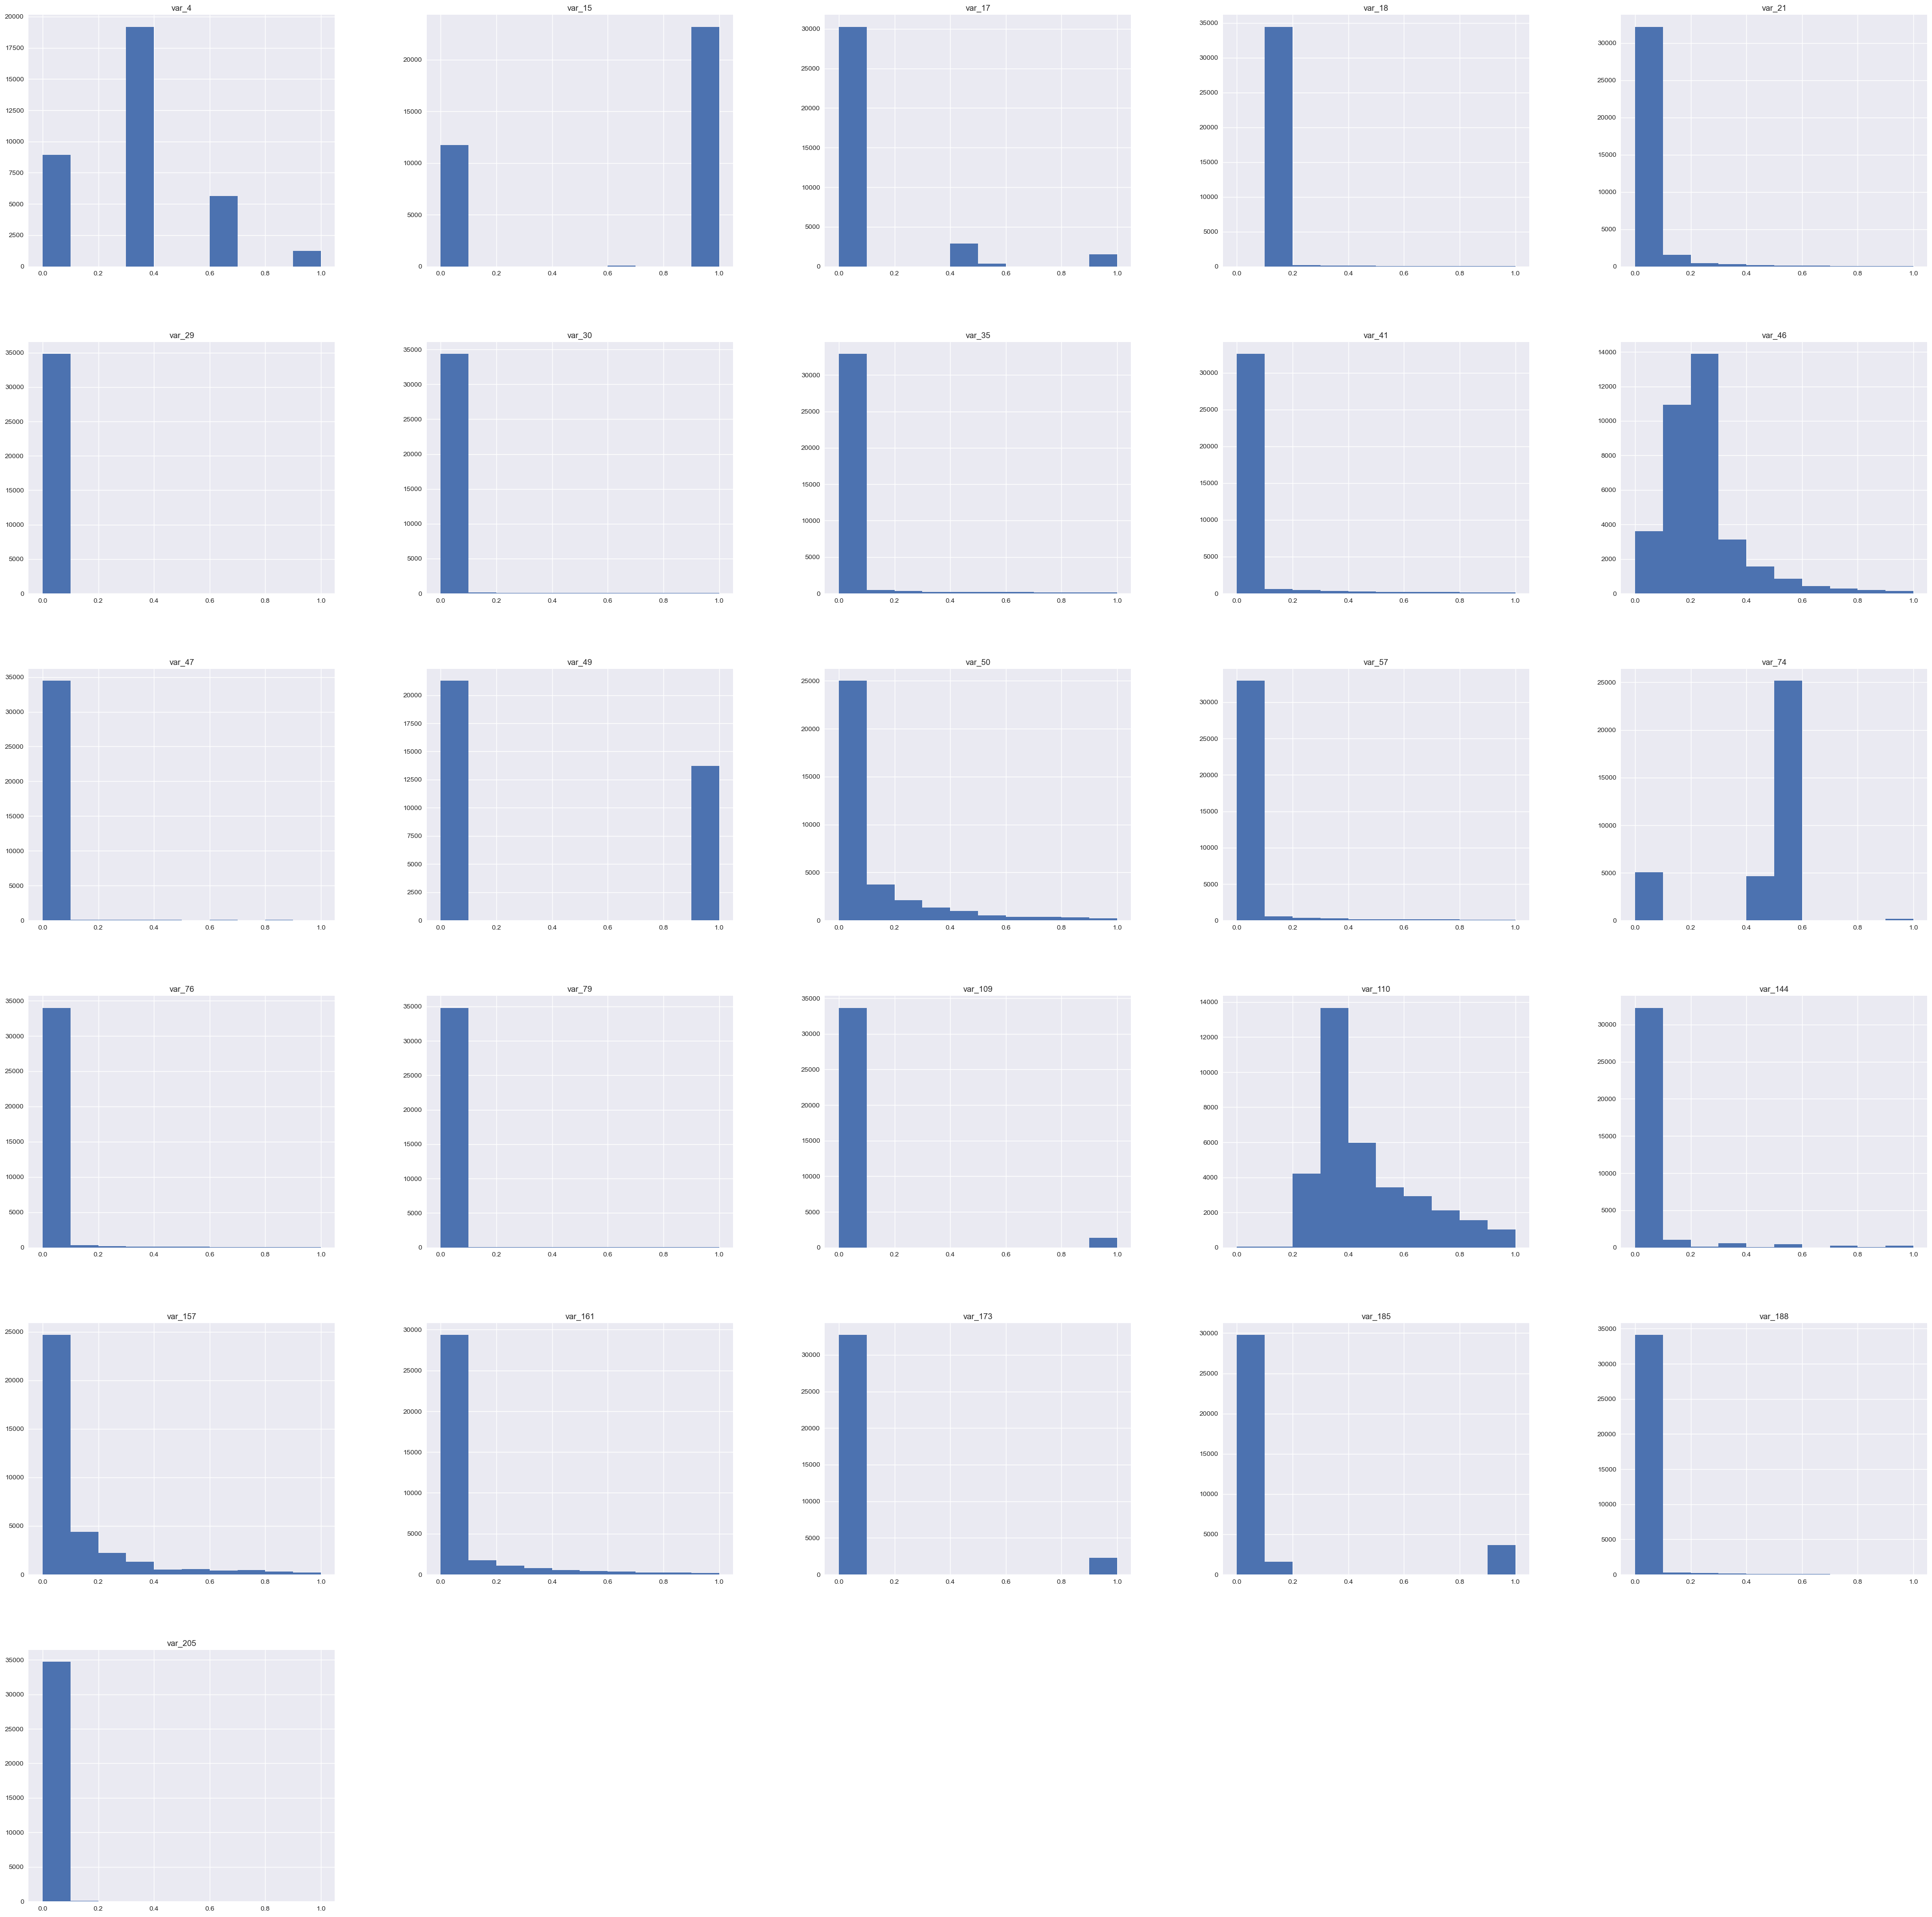

In [127]:
X_train.hist(figsize=(50, 50))

<AxesSubplot:>

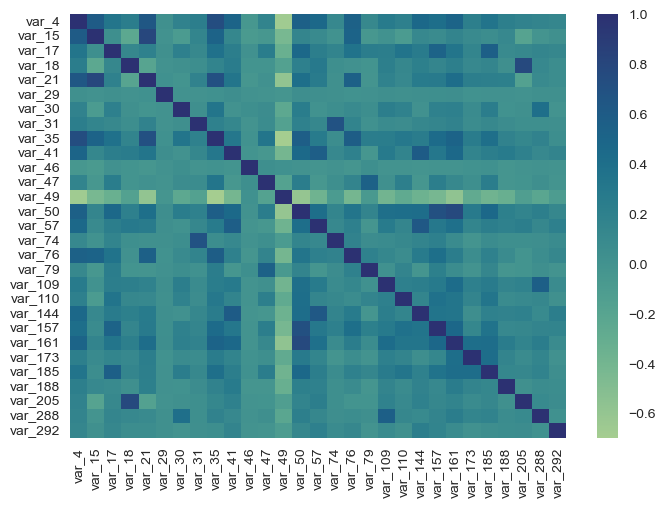

In [329]:
mc = X_train.corr(method="spearman")
sb.heatmap(mc, cmap="crest")

# 7 MODELS 

### PIPELINE FOR TEST DATASET

In [330]:
from sklearn.pipeline import Pipeline

def prepare_dataset(df, consistent_cols = []):
    if len(consistent_cols)==0:
        drop_duplicate_features(df)
        print("duplicated featured deleted")
        drop_constant_features(df)
        print("constant features dropped")
        drop_correlated_features(df)
        print("correlated features deleted")
    else:
        to_drop = filter(lambda i: i not in consistent_cols, df.columns)
        df.drop(columns = list(to_drop), inplace=True)
        print("columns consistent")
    outliers_handler(df)
    print("outliers removed")
    nan_handler(df)
    print("nan removed")
    standarization_handler(df)
    print("dataset standaraized")
    nan_removing(df)

prepare_dataset(X_test, X_train.columns)
print(X_test.shape, "TEST dataset")
print(X_train.shape, "TRAIN dataset")

columns consistent
outliers removed
nan removed
dataset standaraized
(10500, 29) TEST dataset
(35000, 29) TRAIN dataset


In [43]:
outliers_handler(X_test)

In [331]:
# Train and test shape are the same
print(X_test.columns)
print(X_train.columns)
to_drop = filter(lambda i: i not in list(X_train.columns), list(X_test.columns))
X_test.drop(columns = list(to_drop), inplace=True)
print(list(to_drop))

Index(['var_4', 'var_15', 'var_17', 'var_18', 'var_21', 'var_29', 'var_30',
       'var_31', 'var_35', 'var_41', 'var_46', 'var_47', 'var_49', 'var_50',
       'var_57', 'var_74', 'var_76', 'var_79', 'var_109', 'var_110', 'var_144',
       'var_157', 'var_161', 'var_173', 'var_185', 'var_188', 'var_205',
       'var_288', 'var_292'],
      dtype='object')
Index(['var_4', 'var_15', 'var_17', 'var_18', 'var_21', 'var_29', 'var_30',
       'var_31', 'var_35', 'var_41', 'var_46', 'var_47', 'var_49', 'var_50',
       'var_57', 'var_74', 'var_76', 'var_79', 'var_109', 'var_110', 'var_144',
       'var_157', 'var_161', 'var_173', 'var_185', 'var_188', 'var_205',
       'var_288', 'var_292'],
      dtype='object')
[]


### EVALUATING MODELS

In [332]:
# importing ROC-AUC score to valuate models
from sklearn.metrics import roc_auc_score

# importing ROC curve to visualize ROC curve
from sklearn.metrics import roc_curve

# matplotlib to draw plots of ROC-AUC curve
import matplotlib.pyplot as plt

# confusion matrix to show TP, TN, FP, FN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 7.1 RANDOM FOREST

In [333]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [334]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2)

In [335]:
y_pred_proba = rf_model.predict_proba(X_test)

In [336]:
y_pred = rf_model.predict(X_test)

### EVALUATION OF RANDOM FOREST MODEL

In [337]:
# roc curve for models
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

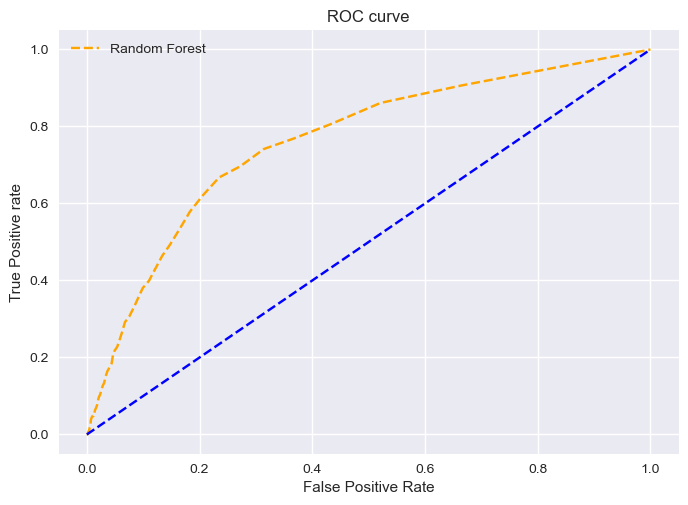

In [338]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [339]:
# auc scores
auc_score_rf = roc_auc_score(y_test, y_pred_proba[:,1])

print("Classification report: ", "\n" ,classification_report(y_test, y_pred))
print("Random Forest Score: ", rf_model.score(X_test,y_test))
print("AUC score: ", auc_score_rf)

Classification report:  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     10082
           1       0.11      0.01      0.03       418

    accuracy                           0.96     10500
   macro avg       0.54      0.50      0.50     10500
weighted avg       0.93      0.96      0.94     10500

Random Forest Score:  0.9562857142857143
AUC score:  0.760314583098022


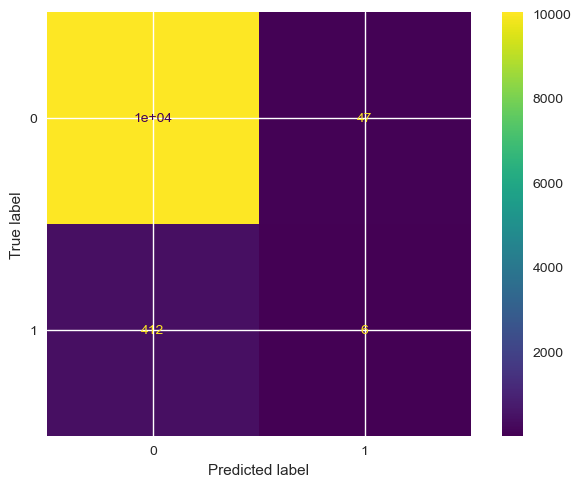

In [340]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()

# ROC CURVE

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [138]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

In [139]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [140]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [141]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [142]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : ndarray of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : ndarray of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
        ``pos_label`` is set

In [143]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.4991073199761952 0.5321466842703231


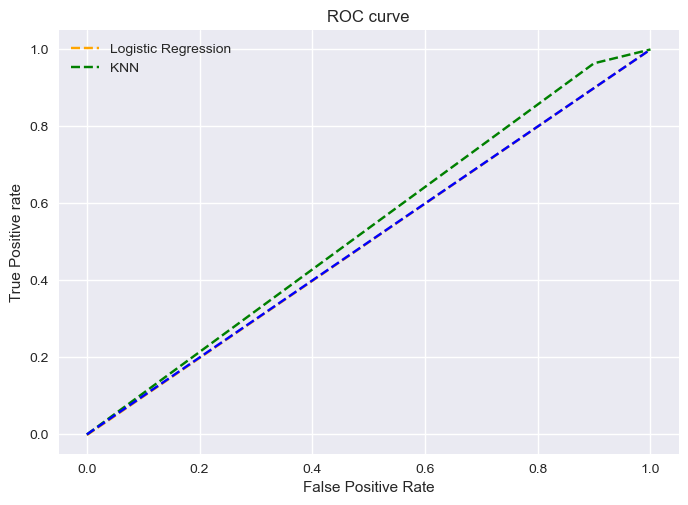

In [144]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Verify feature importance in random forest model

In [62]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   X_train.columns,
                                   columns=['Importance'])

In [63]:
feature_importances.sort_values(by='Importance', ascending=False).head(10)

,Importance
var_46,0.236850
var_110,0.228123
var_29,0.084941
var_190,0.041658
var_35,0.039615
var_157,0.033873
var_76,0.033737
var_21,0.030298
var_75,0.029335
var_4,0.026000


# Dropping highly correlated columns

In [64]:
columns_to_delete = []
for i in range(len(X_train.columns)):
    for j in range(i+1, len(X_train.columns)):
        # we iterate over every pair of columns
        # if the correlation between them is over 0.5 we eliminate the less predictive (for our particular model) column
        if (abs(X_train[X_train.columns[i]].corr(X_train[X_train.columns[j]])) > 0.7):
            if feature_importances.loc[X_train.columns[i]][0] < feature_importances.loc[X_train.columns[j]][0]:
                columns_to_delete.append(feature_importances.loc[X_train.columns[i]].name)
            else:
                columns_to_delete.append(feature_importances.loc[X_train.columns[j]].name)

In [65]:
X_train_2 = X_train.drop(columns_to_delete, axis=1)
X_test_2 = X_test.drop(columns_to_delete, axis=1) 

In [66]:
feature_importances_2 = feature_importances.loc[feature_importances.index.isin(X_train_2)].sort_values(by='Importance', ascending=False)
feature_importances_2

,Importance
var_46,0.236850
var_110,0.228123
var_29,0.084941
var_190,0.041658
var_35,0.039615
var_157,0.033873
var_76,0.033737
var_21,0.030298
var_4,0.026000
var_17,0.023612


In [67]:
rf_model_2 = RandomForestClassifier(n_estimators=100)
rf_model_2.fit(X_train_2, y_train)

RandomForestClassifier()

In [68]:
y_pred_2 = rf_model_2.predict(X_test_2)

In [69]:
print(classification_report(y_pred_2, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     10459
           1       0.01      0.10      0.02        41

    accuracy                           0.96     10500
   macro avg       0.50      0.53      0.50     10500
weighted avg       0.99      0.96      0.97     10500



## 2nd EVALUATION OF RANDOM FOREST MODEL

# Lasso Regression

In [70]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [71]:
lasso.fit(X_train, y_train)

Lasso()

In [72]:
y_pred = lasso.predict(X_test)

In [73]:
print(lasso.score(X_train,y_train))

0.005022299833887689


In [74]:
# zwraca mse - blad sredniokwadratowy

In [75]:
# 
bin_y_pred = (y_pred > 0.5) * 1 

In [76]:
print(classification_report(bin_y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     10500
           1       0.00      0.00      0.00         0

    accuracy                           0.96     10500
   macro avg       0.50      0.48      0.49     10500
weighted avg       1.00      0.96      0.98     10500



C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# przekształcam wektor prawdopodobieństw z progiem 0.5

In [78]:
print("Slope: %.2f" % lasso.coef_[0])

Slope: -0.00


# Gradient Boosting model

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [80]:
# Create a gradient boosting regressor object
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

In [81]:
# Train the model on the training data
gb.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=1, random_state=42)

In [82]:
# Make predictions on the testing data
y_pred = gb.predict(X_test)

In [83]:
# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# mse jest tylko dla zmiennych ciągłych a my mamy binarne, liczyć GIMME lub AUC

Mean Squared Error: 0.036195723803122325


# XGBoost model

In [84]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [85]:
# Create a DMatrix from the training data
dtrain = xgb.DMatrix(X_train, label=y_train)

# Set XGBoost parameters
params = {
    "objective": "reg:squarederror",
    "eta": 0.1,
    "max_depth": 3,
    "seed": 42,
}

In [86]:
# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)


In [87]:
# Make predictions on the testing data
dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# mse jest tylko dla zmiennych ciągłych a my mamy binarne, liczyć GIMME lub AUC

Mean Squared Error: 0.038194507493678004


# EXPORTING

In [ ]:
# exporting preprocessed dataset to csv
relative_path = "./preprocessed"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)
    
X_train.to_csv('preprocessed/train_dataset_1.csv', encoding='utf-8')